### Hypothesis for Analysis### 

### Analyze relationships between employee satisfaction, job roles, and performance per department:
1. Correlation Visualizations per department.
2. Does the employees department impact attrition, satisfaction or performance?
3. Make hypothesis based off the correlations.


### Hypothesize causes of employee attrition:

1. 
- **Null Hypothesis (H₀)**: Employees with high values for the bottom-5 correlated features to attrition ("TotalWorkingYears_normalized," "YearsWithCurrManager_normalized," "YearsInCurrentRole_normalized," "MonthlyIncome_normalized," "YearsAtCompany_normalized") do not have a lower rate of attrition compared to the general population.

- **Alternative Hypothesis (H₁)**: Employees with high values for the bottom-5 correlated features to attrition have a lower rate of attrition compared to the general population.

- **Rationale**: The data shows 1,152 rows where these overlap conditions are met, of which 146 correspond to attrition (12.67%), compared to 1,006 rows without attrition (87.33%). This suggests these features might be protective against attrition.

2. 
- **Null Hypothesis (H₀)**: "JobRole_Sales Representative" employees with normalized monthly incomes below the 50th percentile do not experience higher attrition rates compared to other sales representatives.

- **Alternative Hypothesis (H₁)**: "JobRole_Sales Representative" employees with normalized monthly incomes below the 50th percentile experience higher attrition rates.

- **Rationale**: Sales roles are often tied to performance-based incentives; low income might reflect poor performance, dissatisfaction, or misaligned expectations.

3. 
- **Null Hypothesis (H₀)**: Employees with normalized monthly incomes in the bottom 25th percentile are not more likely to experience high levels of overtime compared to the general population.

- **Alternative Hypothesis (H₁)**: Employees with normalized monthly incomes in the bottom 25th percentile are more likely to experience high levels of overtime compared to the general population.

- **Rationale**: While income and attrition have a negative correlation, overtime might disproportionately impact low-income workers, creating unexpected attrition triggers.

### 4. Visualization of Hypothesis and Statistical Analysis
I will use Matplotlib and Seaborn to create bar plots, box plots, and heatmaps to visualize key variables, correlations, ttests/ ANOVA and linear regressions. I will also develop interactive visualizations to allow dynamic exploration of data and its influence on attrition. These visualizations will help to teach a prediction model for attrtion rate based on certain variables. 

### 5. Retention Strategy Development
Based on my analysis, I will propose strategies to reduce attrition, including improving job satisfaction, enhancing work-life balance, and providing targeted support for high-risk employee groups.



In [87]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/teitelbaumsair/Desktop/Hackathon_2/Hackathon_2/cleaned_and_normalized_data.csv')

In [88]:
df['YearsAtCompany_normalized'].describe()

count    1470.000000
mean        2.404559
std         1.107742
min         0.000000
25%         1.732051
50%         2.236068
75%         3.000000
max         6.324555
Name: YearsAtCompany_normalized, dtype: float64

### Distribution of key normalized datapoints.

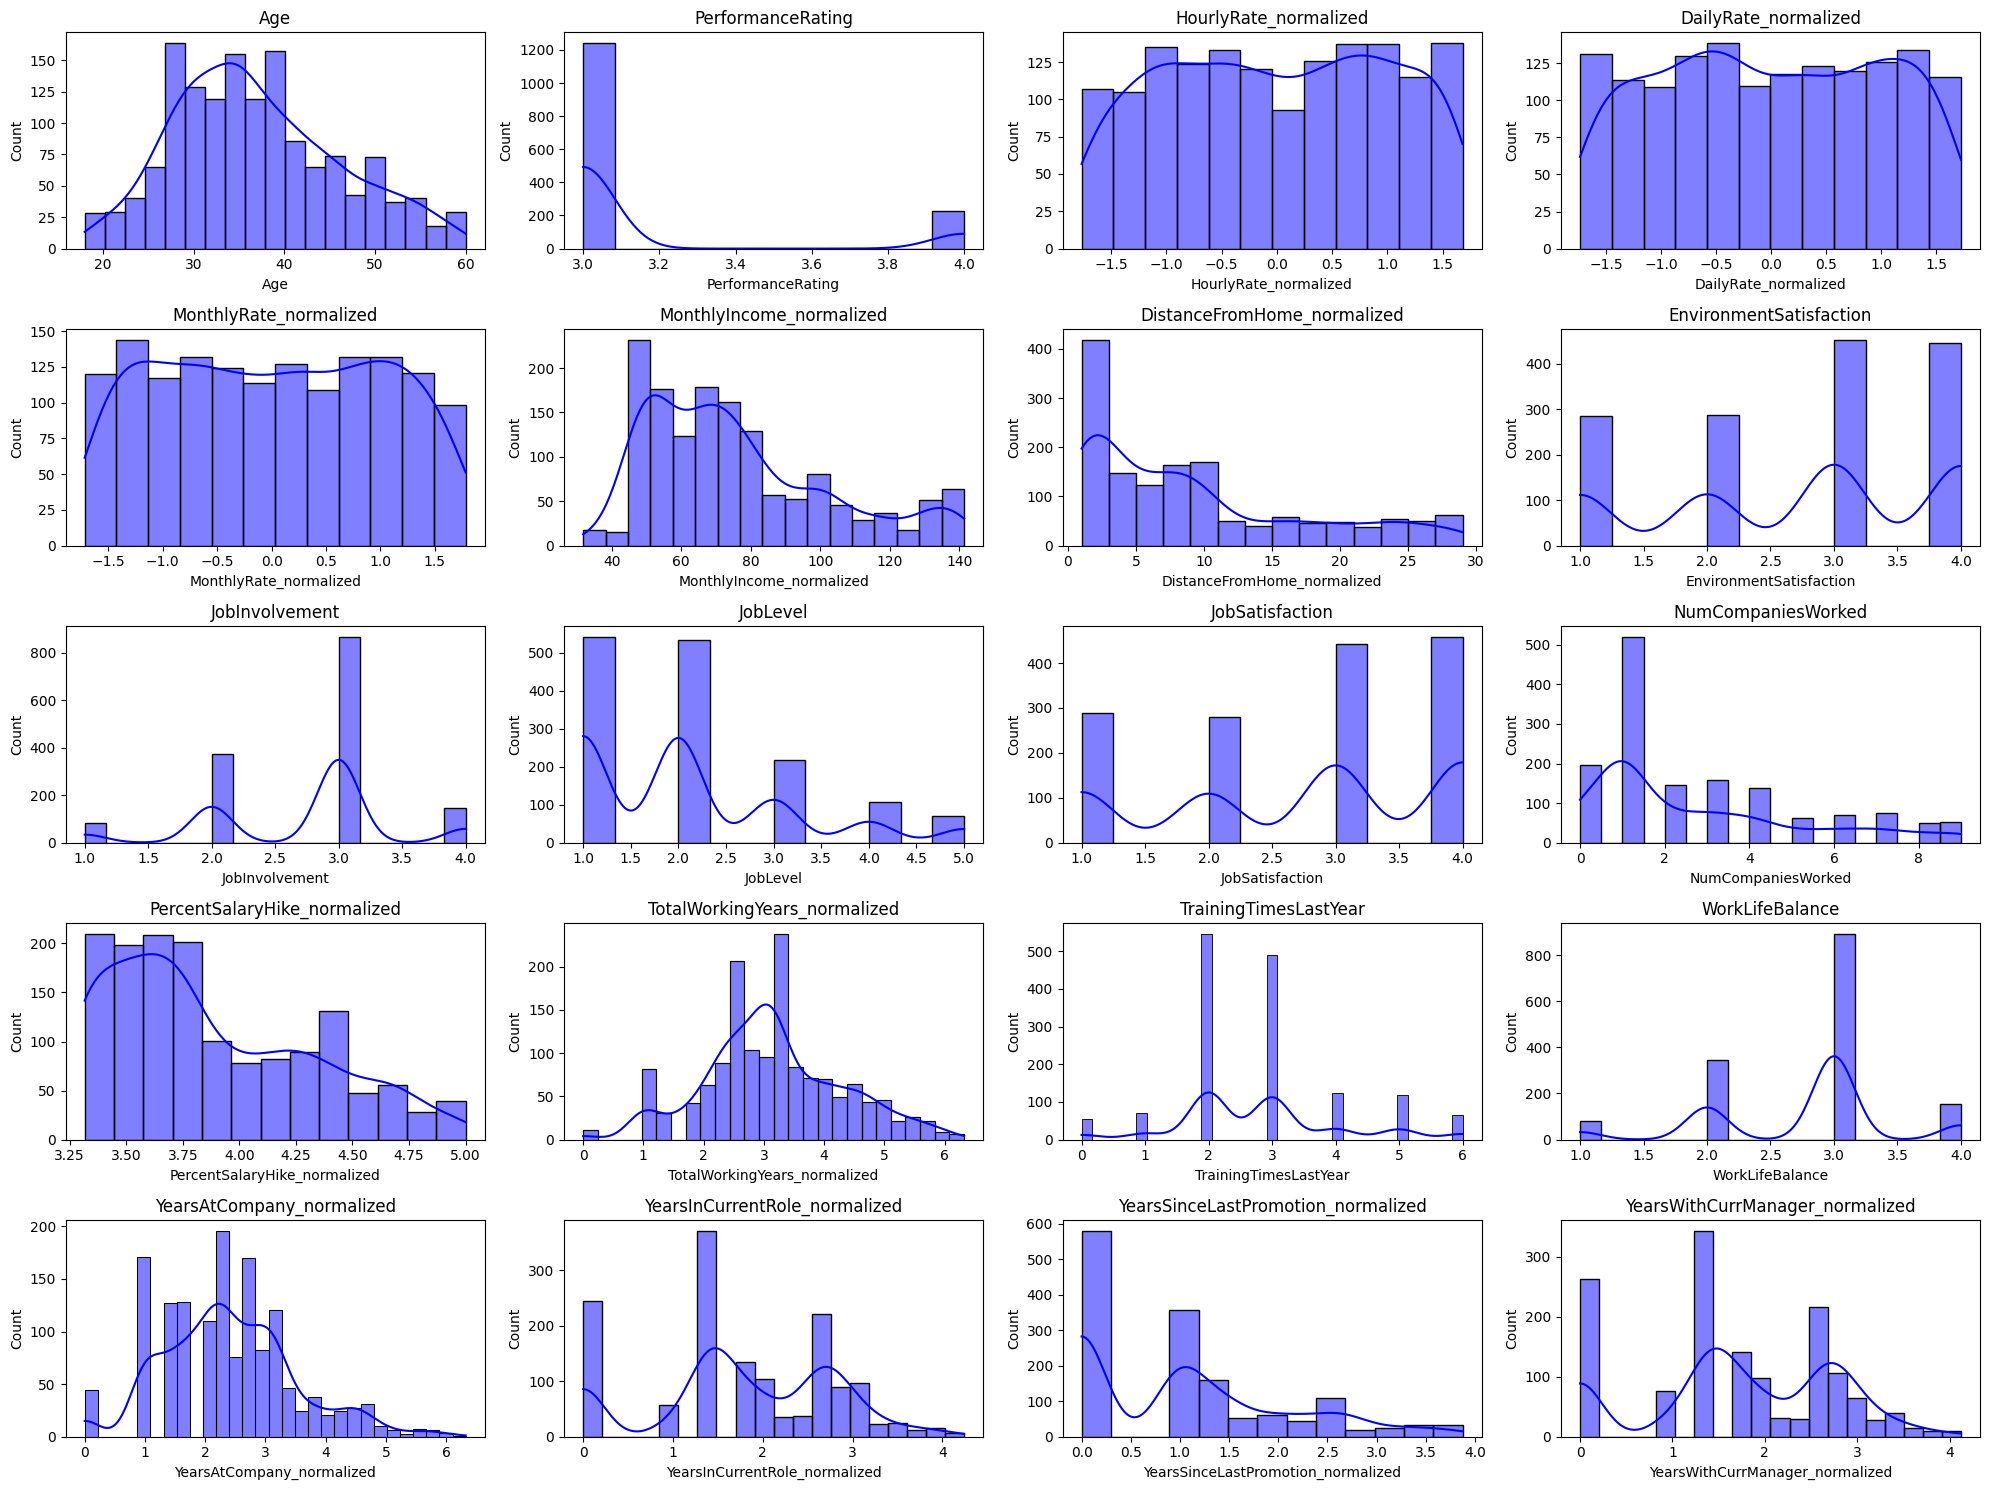

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = [
    'Age','PerformanceRating','HourlyRate_normalized', 'DailyRate_normalized', 'MonthlyRate_normalized', 'MonthlyIncome_normalized',
    'DistanceFromHome_normalized', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
    'NumCompaniesWorked', 'PercentSalaryHike_normalized', 'TotalWorkingYears_normalized', 'TrainingTimesLastYear',
    'WorkLifeBalance', 'YearsAtCompany_normalized', 'YearsInCurrentRole_normalized', 'YearsSinceLastPromotion_normalized',
    'YearsWithCurrManager_normalized'
]

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], kde=True, ax=axes[i], color='blue', edgecolor='black')
    axes[i].set_title(column)

for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Correlation Heatmap for Each Department

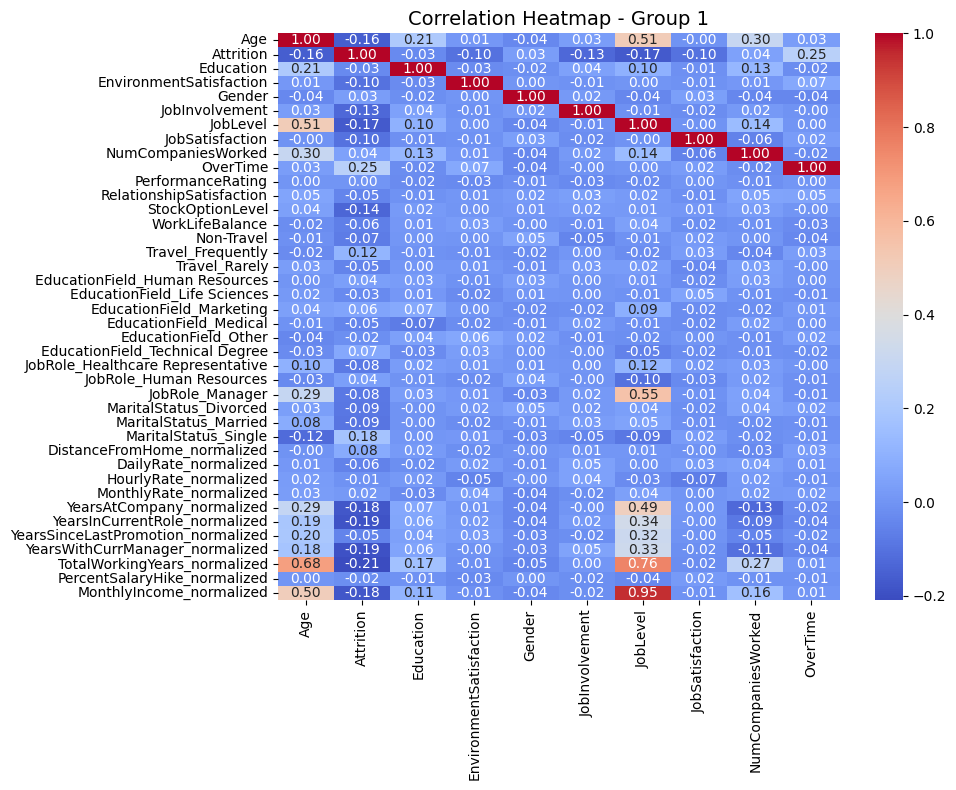

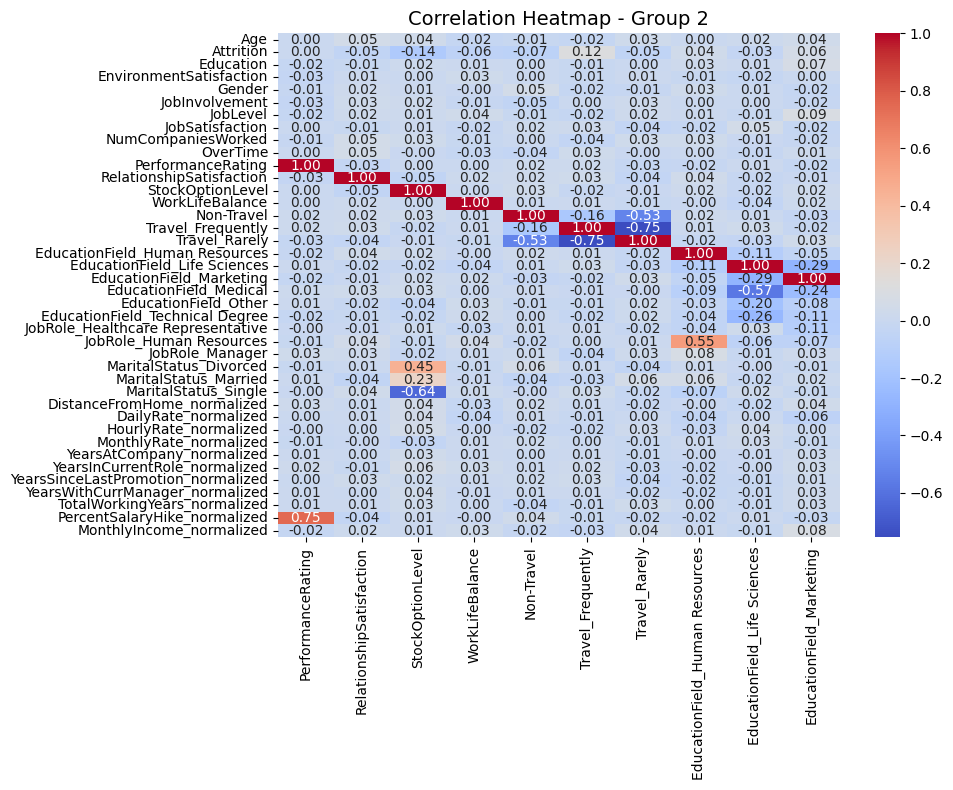

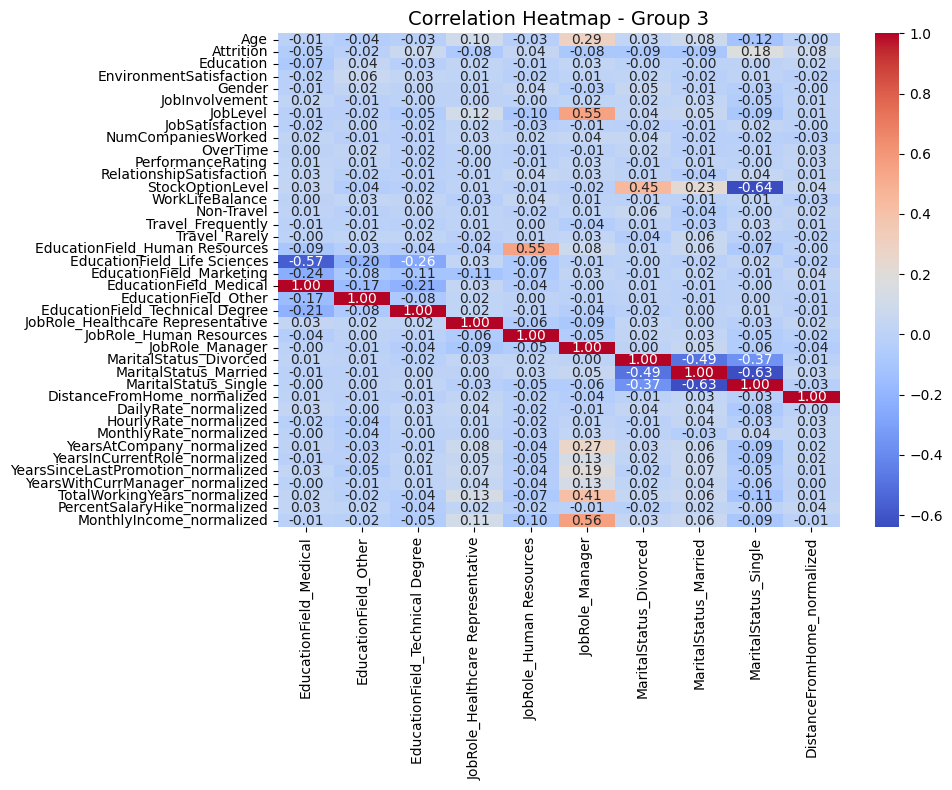

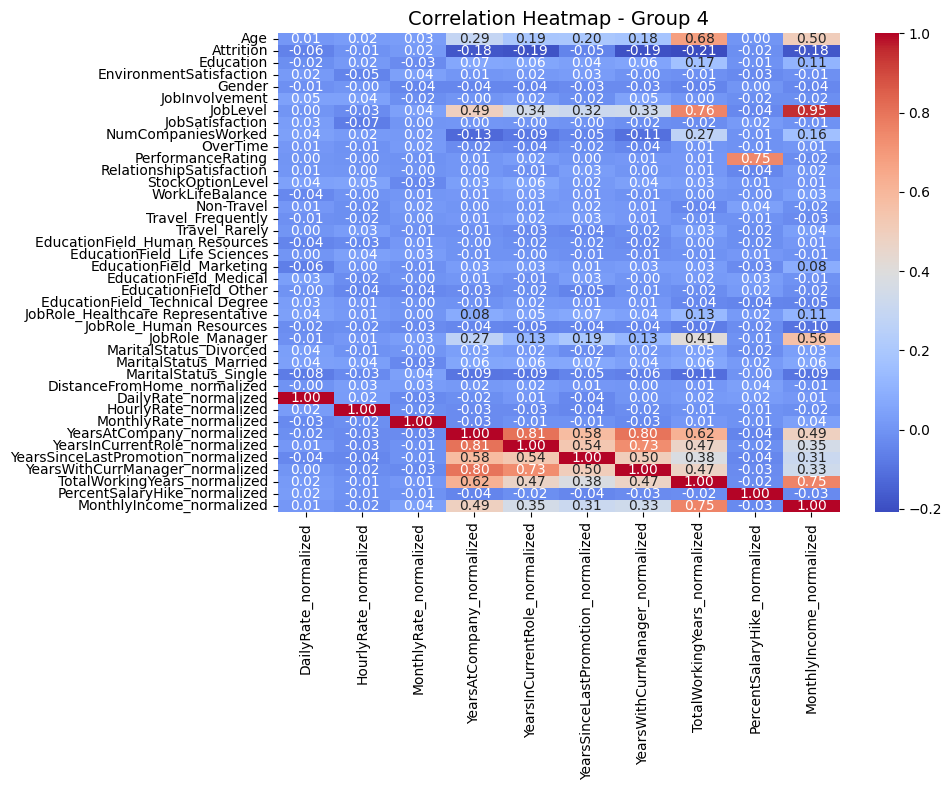

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hr_columns = [
    'Age', 'Attrition', 'Education', 'EnvironmentSatisfaction',
    'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel',
    'WorkLifeBalance', 'Non-Travel', 'Travel_Frequently', 'Travel_Rarely',
    'EducationField_Human Resources', 'EducationField_Life Sciences',
    'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other',
    'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
    'JobRole_Human Resources', 'JobRole_Manager', 'MaritalStatus_Divorced',
    'MaritalStatus_Married', 'MaritalStatus_Single', 'DistanceFromHome_normalized',
    'DailyRate_normalized', 'HourlyRate_normalized', 'MonthlyRate_normalized',
    'YearsAtCompany_normalized', 'YearsInCurrentRole_normalized', 'YearsSinceLastPromotion_normalized',
    'YearsWithCurrManager_normalized', 'TotalWorkingYears_normalized', 'PercentSalaryHike_normalized',
    'MonthlyIncome_normalized'
]
hr_correlation_matrix = df[hr_columns].select_dtypes(include=['number']).corr()
split_size = len(hr_columns) // 4
x_groups = [
    hr_columns[:split_size],
    hr_columns[split_size:2 * split_size],
    hr_columns[2 * split_size:3 * split_size],
    hr_columns[3 * split_size:]
]
for i, x_group in enumerate(x_groups, start=1):
    partial_matrix = hr_correlation_matrix[x_group]  # Select columns for this group
    plt.figure(figsize=(10, 8))
    sns.heatmap(partial_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title(f'Correlation Heatmap - Group {i}', fontsize=14)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

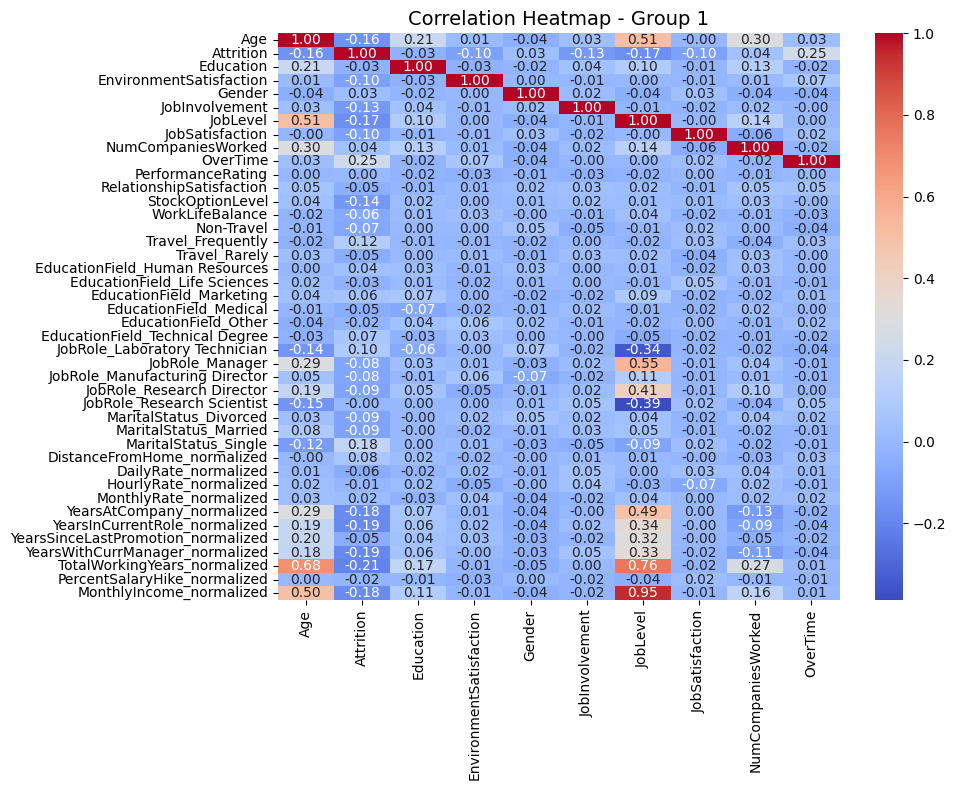

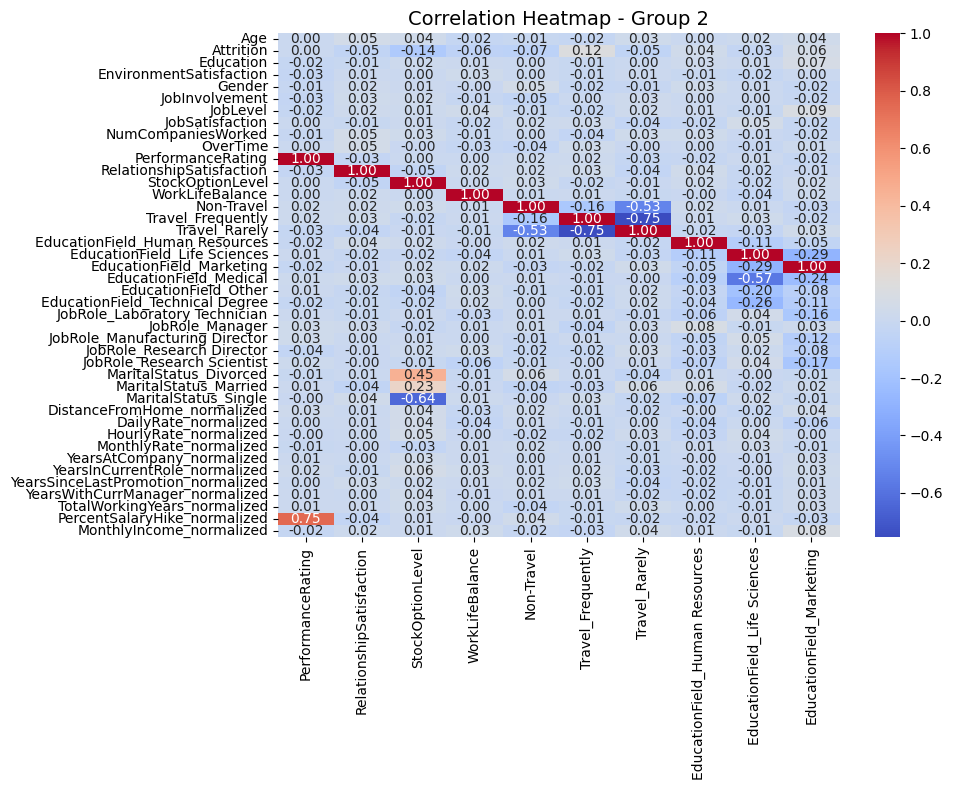

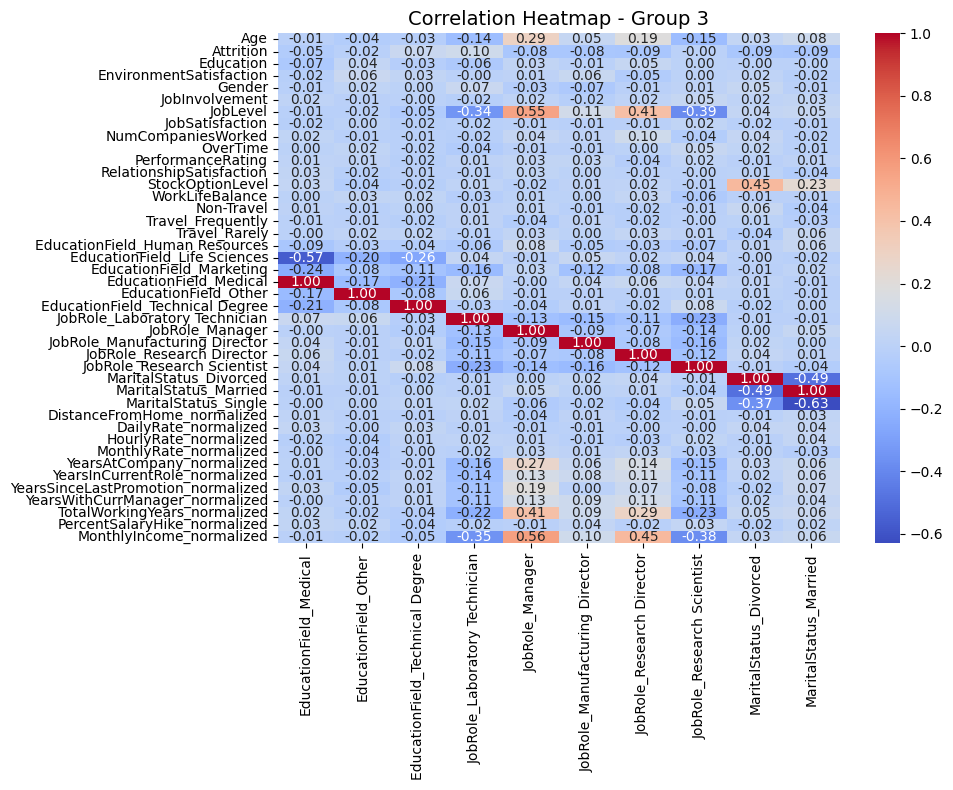

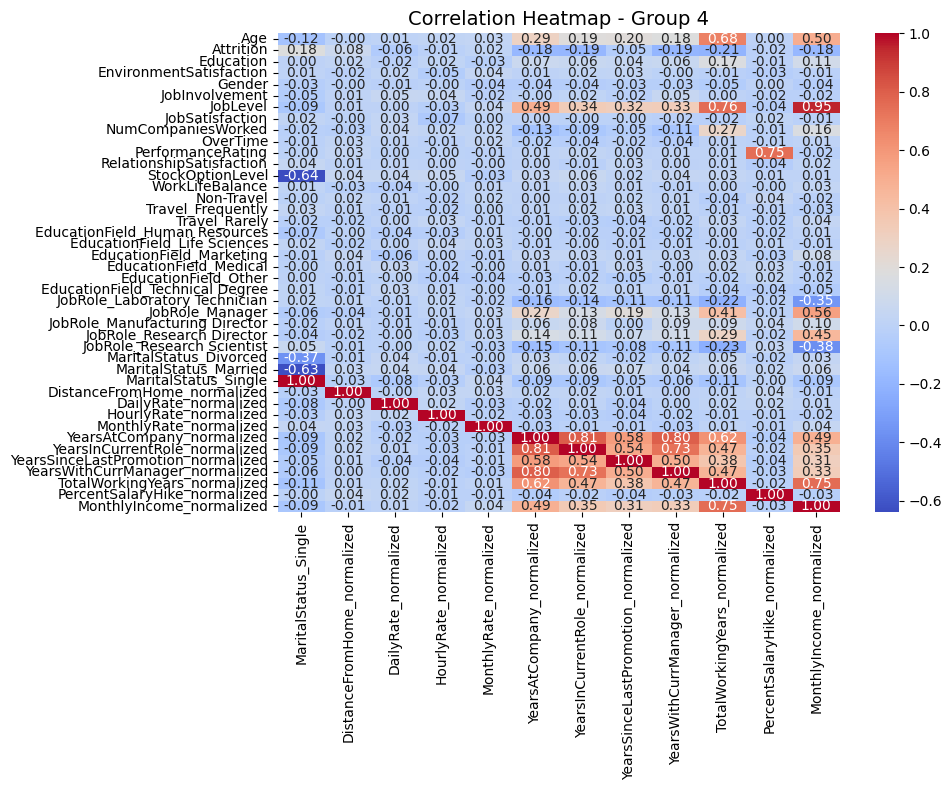

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rd_columns = ['Age', 'Attrition', 'Education', 'EnvironmentSatisfaction',
    'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel',
    'WorkLifeBalance', 'Non-Travel', 'Travel_Frequently', 'Travel_Rarely',
    'EducationField_Human Resources', 'EducationField_Life Sciences',
    'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other',
    'EducationField_Technical Degree','JobRole_Laboratory Technician', 
    'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 
    'JobRole_Research Scientist', 'MaritalStatus_Divorced',
    'MaritalStatus_Married', 'MaritalStatus_Single', 'DistanceFromHome_normalized',
    'DailyRate_normalized', 'HourlyRate_normalized', 'MonthlyRate_normalized',
    'YearsAtCompany_normalized', 'YearsInCurrentRole_normalized', 'YearsSinceLastPromotion_normalized',
    'YearsWithCurrManager_normalized', 'TotalWorkingYears_normalized', 'PercentSalaryHike_normalized',
    'MonthlyIncome_normalized'
]
rd_correlation_matrix = df[rd_columns].select_dtypes(include=['number']).corr()
split_size = len(rd_columns) // 4
x_groups = [
    rd_columns[:split_size],
    rd_columns[split_size:2 * split_size],
    rd_columns[2 * split_size:3 * split_size],
    rd_columns[3 * split_size:]
]
for i, x_group in enumerate(x_groups, start=1):
    partial_matrix = rd_correlation_matrix[x_group]  # Select columns for this group
    plt.figure(figsize=(10, 8))
    sns.heatmap(partial_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title(f'Correlation Heatmap - Group {i}', fontsize=14)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

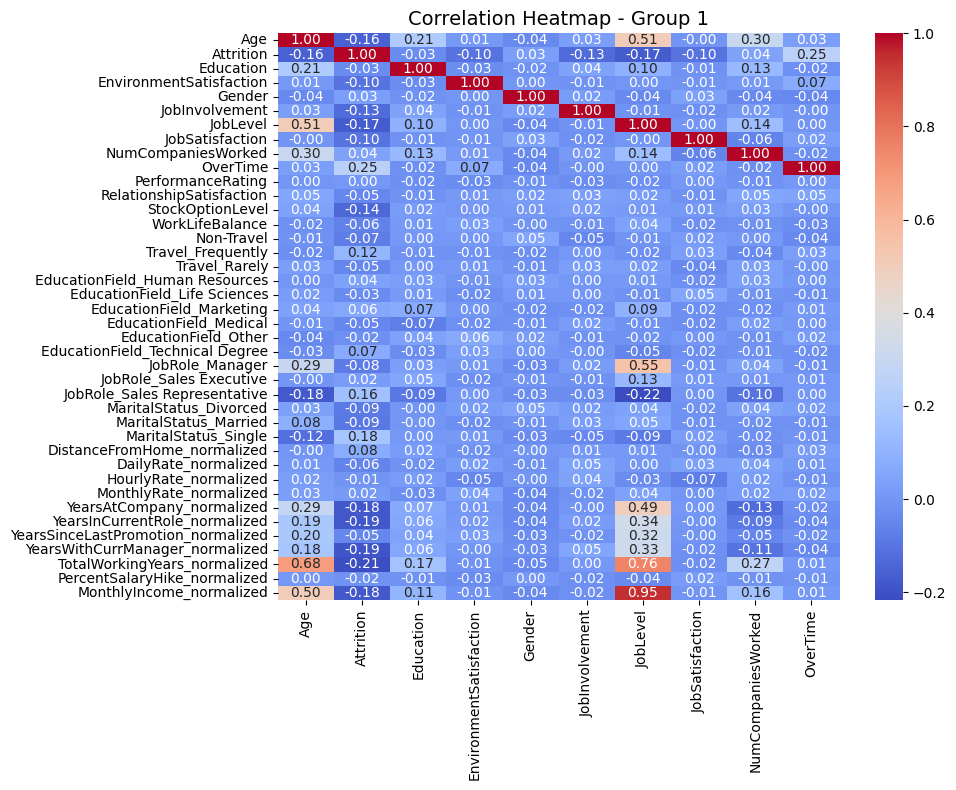

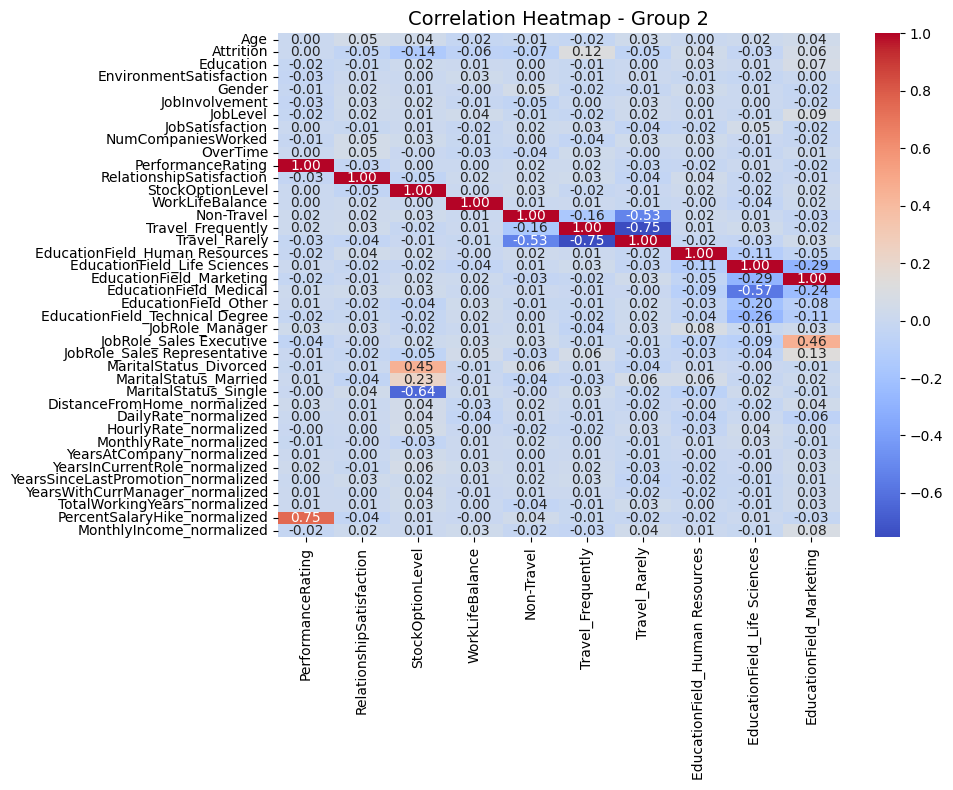

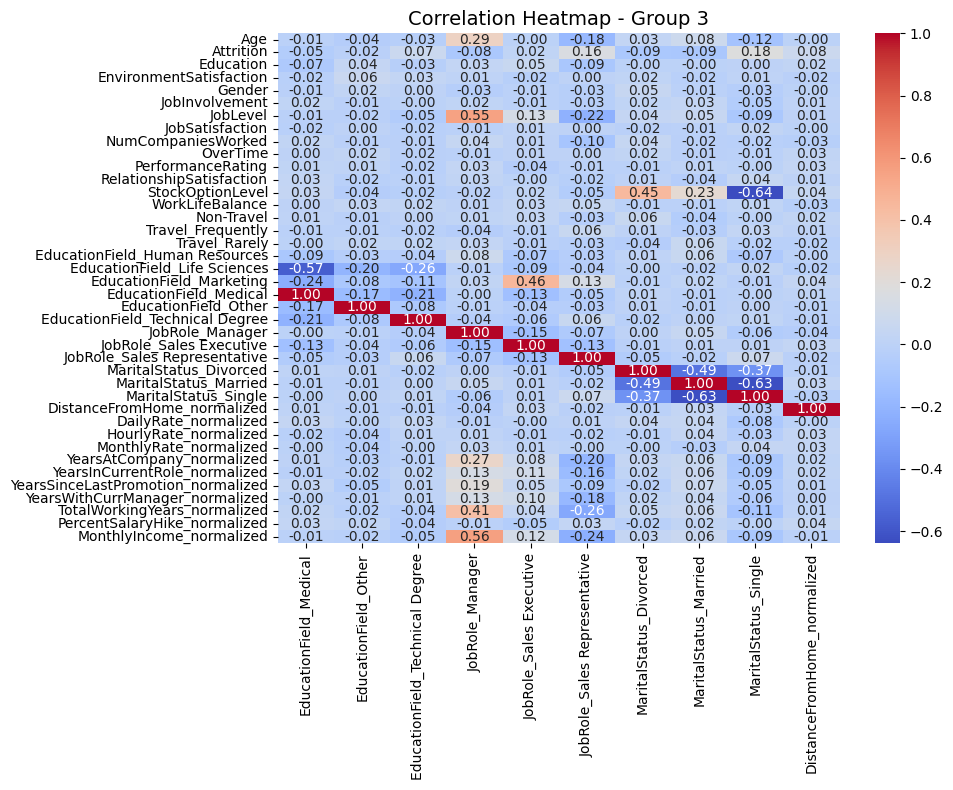

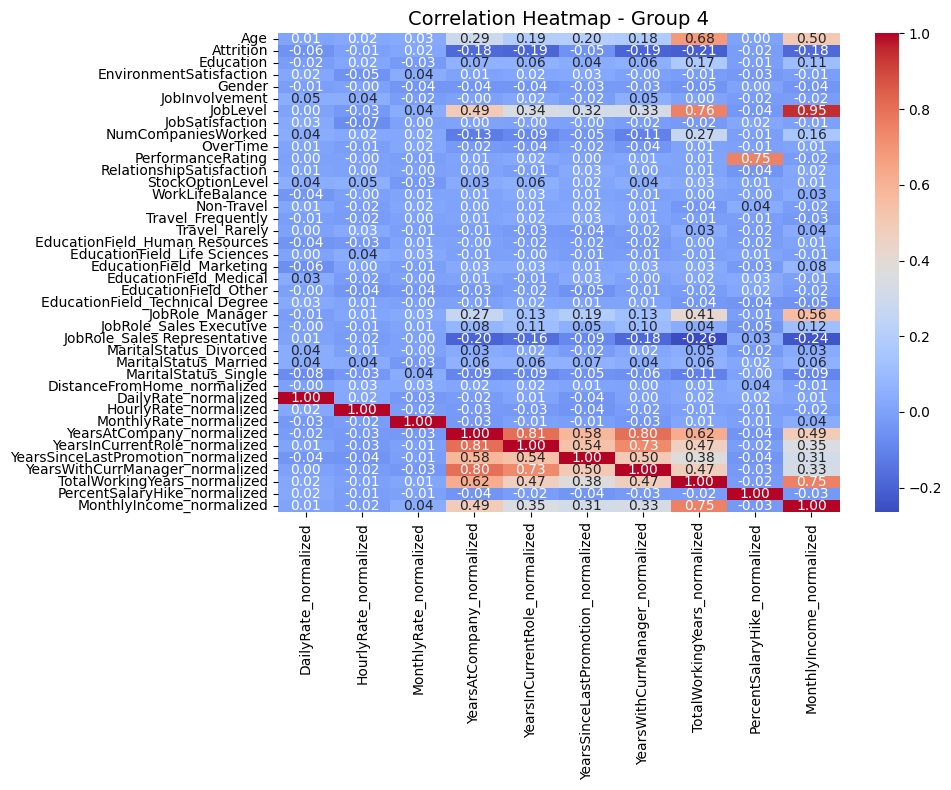

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sales_columns = ['Age', 'Attrition', 'Education', 'EnvironmentSatisfaction',
    'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel',
    'WorkLifeBalance', 'Non-Travel', 'Travel_Frequently', 'Travel_Rarely',
    'EducationField_Human Resources', 'EducationField_Life Sciences',
    'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other',
    'EducationField_Technical Degree', 'JobRole_Manager','JobRole_Sales Executive', 'JobRole_Sales Representative', 
    'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 
    'DistanceFromHome_normalized', 'DailyRate_normalized', 'HourlyRate_normalized', 
    'MonthlyRate_normalized', 'YearsAtCompany_normalized', 'YearsInCurrentRole_normalized', 
    'YearsSinceLastPromotion_normalized', 'YearsWithCurrManager_normalized', 
    'TotalWorkingYears_normalized', 'PercentSalaryHike_normalized', 'MonthlyIncome_normalized'
]
sales_correlation_matrix = df[sales_columns].select_dtypes(include=['number']).corr()
split_size = len(sales_columns) // 4
x_groups = [
    sales_columns[:split_size],
    sales_columns[split_size:2 * split_size],
    sales_columns[2 * split_size:3 * split_size],
    sales_columns[3 * split_size:]
]
for i, x_group in enumerate(x_groups, start=1):
    partial_matrix = sales_correlation_matrix[x_group]  # Select columns for this group
    plt.figure(figsize=(10, 8))
    sns.heatmap(partial_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title(f'Correlation Heatmap - Group {i}', fontsize=14)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

### Top 5/ Bottom 5 Correlations per Department to Attrition and Employee Satisfaction:

In [93]:
#HR Department - Attrition
hr_data = df[hr_columns]
correlation_matrix = hr_data.corr(method='pearson')
correlation_matrix = correlation_matrix.mask(correlation_matrix == 1)
attrition_corr = correlation_matrix['Attrition'].dropna()
top_5_corr = attrition_corr.sort_values(ascending=False).head(5)
bottom_5_corr = attrition_corr.sort_values(ascending=True).head(5)

# Print the results
print("Top 5 correlated elements with 'Attrition':")
print(top_5_corr)

print("\nBottom 5 correlated elements with 'Attrition':")
print(bottom_5_corr)

Top 5 correlated elements with 'Attrition':
OverTime                           0.246118
MaritalStatus_Single               0.175419
Travel_Frequently                  0.115143
DistanceFromHome_normalized        0.077924
EducationField_Technical Degree    0.069355
Name: Attrition, dtype: float64

Bottom 5 correlated elements with 'Attrition':
TotalWorkingYears_normalized      -0.208334
YearsWithCurrManager_normalized   -0.191258
YearsInCurrentRole_normalized     -0.186062
MonthlyIncome_normalized          -0.178660
YearsAtCompany_normalized         -0.178602
Name: Attrition, dtype: float64


In [94]:
#HR Department - Environment Satisfaction
hr_data = df[hr_columns]
correlation_matrix = hr_data.corr(method='pearson')
correlation_matrix = correlation_matrix.mask(correlation_matrix == 1)
EnvironmentSfactionatis_corr = correlation_matrix['EnvironmentSatisfaction'].dropna()
top_5_corr = EnvironmentSfactionatis_corr.sort_values(ascending=False).head(5)
bottom_5_corr = EnvironmentSfactionatis_corr.sort_values(ascending=True).head(5)

# Print the results
print("Top 5 correlated elements with 'EnvironmentSatisfaction':")
print(top_5_corr)

print("\nBottom 5 correlated elements with 'EnvironmentSatisfaction':")
print(bottom_5_corr)

Top 5 correlated elements with 'EnvironmentSatisfaction':
OverTime                           0.070132
EducationField_Other               0.064602
MonthlyRate_normalized             0.037600
EducationField_Technical Degree    0.027713
WorkLifeBalance                    0.027627
Name: EnvironmentSatisfaction, dtype: float64

Bottom 5 correlated elements with 'EnvironmentSatisfaction':
Attrition                      -0.103369
HourlyRate_normalized          -0.049857
PercentSalaryHike_normalized   -0.031438
PerformanceRating              -0.029548
Education                      -0.027128
Name: EnvironmentSatisfaction, dtype: float64


In [95]:
#R&D Department - Attrition
rd_data = df[rd_columns]
correlation_matrix = rd_data.corr(method='pearson')
correlation_matrix = correlation_matrix.mask(correlation_matrix == 1)
attrition_corr = correlation_matrix['Attrition'].dropna()
top_5_corr = attrition_corr.sort_values(ascending=False).head(5)
bottom_5_corr = attrition_corr.sort_values(ascending=True).head(5)

# Print the results
print("Top 5 correlated elements with 'Attrition':")
print(top_5_corr)

print("\nBottom 5 correlated elements with 'Attrition':")
print(bottom_5_corr)

Top 5 correlated elements with 'Attrition':
OverTime                         0.246118
MaritalStatus_Single             0.175419
Travel_Frequently                0.115143
JobRole_Laboratory Technician    0.098290
DistanceFromHome_normalized      0.077924
Name: Attrition, dtype: float64

Bottom 5 correlated elements with 'Attrition':
TotalWorkingYears_normalized      -0.208334
YearsWithCurrManager_normalized   -0.191258
YearsInCurrentRole_normalized     -0.186062
MonthlyIncome_normalized          -0.178660
YearsAtCompany_normalized         -0.178602
Name: Attrition, dtype: float64


In [96]:
#R&D Department - EnvironmentSfactionatis
rd_data = df[rd_columns]
correlation_matrix = rd_data.corr(method='pearson')
correlation_matrix = correlation_matrix.mask(correlation_matrix == 1)
EnvironmentSfactionatis_corr = correlation_matrix['EnvironmentSatisfaction'].dropna()
top_5_corr = EnvironmentSfactionatis_corr.sort_values(ascending=False).head(5)
bottom_5_corr = EnvironmentSfactionatis_corr.sort_values(ascending=True).head(5)

# Print the results
print("Top 5 correlated elements with 'EnvironmentSatisfaction':")
print(top_5_corr)

print("\nBottom 5 correlated elements with 'EnvironmentSatisfaction':")
print(bottom_5_corr)

Top 5 correlated elements with 'EnvironmentSatisfaction':
OverTime                           0.070132
EducationField_Other               0.064602
JobRole_Manufacturing Director     0.059178
MonthlyRate_normalized             0.037600
EducationField_Technical Degree    0.027713
Name: EnvironmentSatisfaction, dtype: float64

Bottom 5 correlated elements with 'EnvironmentSatisfaction':
Attrition                      -0.103369
HourlyRate_normalized          -0.049857
JobRole_Research Director      -0.048689
PercentSalaryHike_normalized   -0.031438
PerformanceRating              -0.029548
Name: EnvironmentSatisfaction, dtype: float64


In [97]:
#Sales Department - Attrition
sales_data = df[sales_columns]
correlation_matrix = sales_data.corr(method='pearson')
correlation_matrix = correlation_matrix.mask(correlation_matrix == 1)
attrition_corr = correlation_matrix['Attrition'].dropna()
top_5_corr = attrition_corr.sort_values(ascending=False).head(5)
bottom_5_corr = attrition_corr.sort_values(ascending=True).head(5)

# Print the results
print("Top 5 correlated elements with 'Attrition':")
print(top_5_corr)

print("\nBottom 5 correlated elements with 'Attrition':")
print(bottom_5_corr)

Top 5 correlated elements with 'Attrition':
OverTime                        0.246118
MaritalStatus_Single            0.175419
JobRole_Sales Representative    0.157234
Travel_Frequently               0.115143
DistanceFromHome_normalized     0.077924
Name: Attrition, dtype: float64

Bottom 5 correlated elements with 'Attrition':
TotalWorkingYears_normalized      -0.208334
YearsWithCurrManager_normalized   -0.191258
YearsInCurrentRole_normalized     -0.186062
MonthlyIncome_normalized          -0.178660
YearsAtCompany_normalized         -0.178602
Name: Attrition, dtype: float64


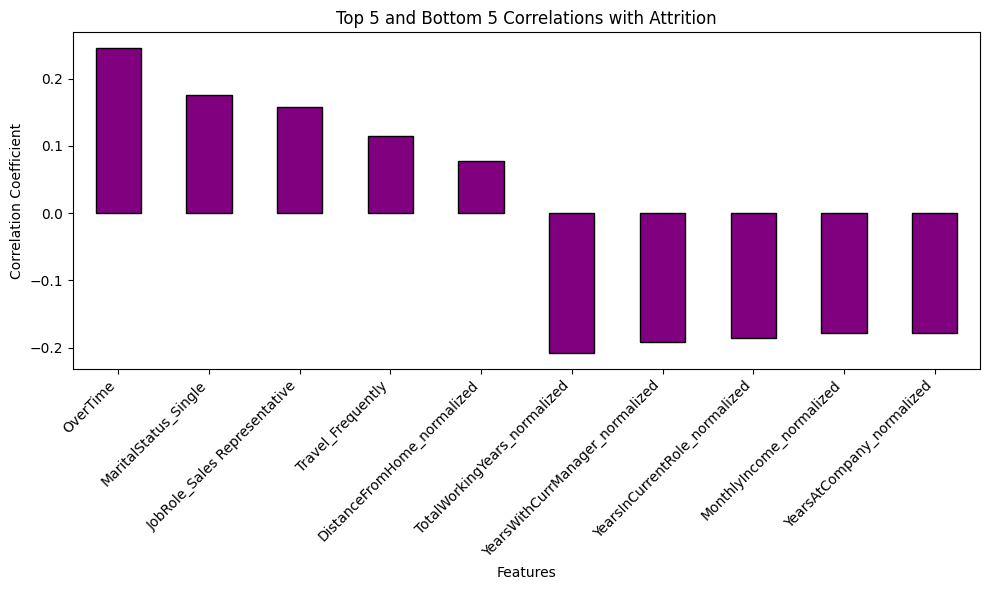

In [98]:
# Extract top 5 and bottom 5 correlated features
top_5_corr = attrition_corr.sort_values(ascending=False).head(5)
bottom_5_corr = attrition_corr.sort_values(ascending=True).head(5)

# Plot the results
plt.figure(figsize=(10, 6))
top_bottom_corr = pd.concat([top_5_corr, bottom_5_corr])
top_bottom_corr.plot(kind='bar', color=['blue' if x in top_5_corr else 'purple' for x in top_bottom_corr], edgecolor='black')
plt.title("Top 5 and Bottom 5 Correlations with Attrition")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [99]:
#Sales Department - EnvironmentSfactionatis
sales_data = df[sales_columns]
correlation_matrix = sales_data.corr(method='pearson')
correlation_matrix = correlation_matrix.mask(correlation_matrix == 1)
EnvironmentSfactionatis_corr = correlation_matrix['EnvironmentSatisfaction'].dropna()
top_5_corr = EnvironmentSfactionatis_corr.sort_values(ascending=False).head(5)
bottom_5_corr = EnvironmentSfactionatis_corr.sort_values(ascending=True).head(5)

# Print the results
print("Top 5 correlated elements with 'EnvironmentSatisfaction':")
print(top_5_corr)

print("\nBottom 5 correlated elements with 'EnvironmentSatisfaction':")
print(bottom_5_corr)

Top 5 correlated elements with 'EnvironmentSatisfaction':
OverTime                           0.070132
EducationField_Other               0.064602
MonthlyRate_normalized             0.037600
EducationField_Technical Degree    0.027713
WorkLifeBalance                    0.027627
Name: EnvironmentSatisfaction, dtype: float64

Bottom 5 correlated elements with 'EnvironmentSatisfaction':
Attrition                      -0.103369
HourlyRate_normalized          -0.049857
PercentSalaryHike_normalized   -0.031438
PerformanceRating              -0.029548
Education                      -0.027128
Name: EnvironmentSatisfaction, dtype: float64


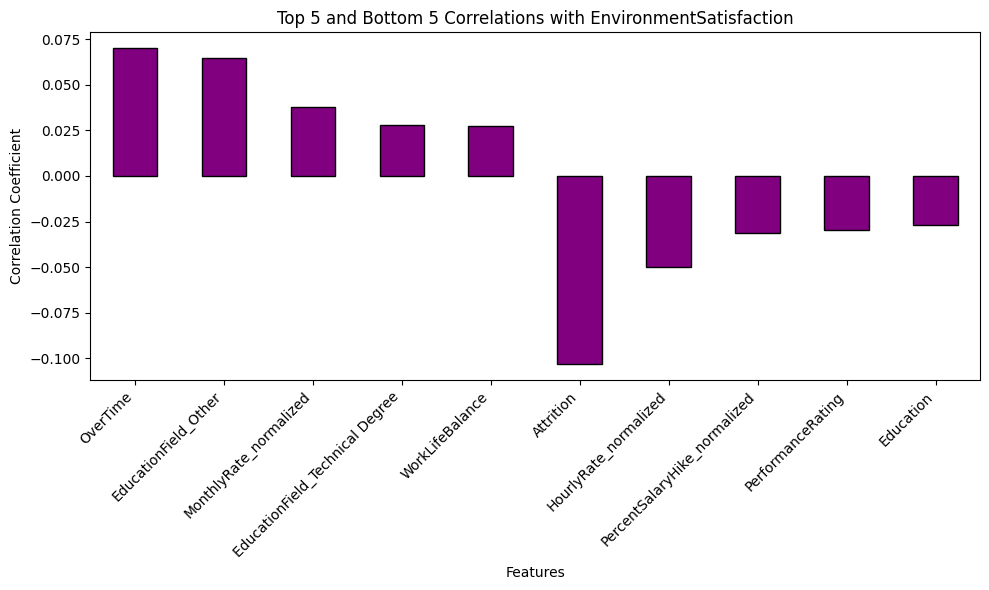

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sales_data = df[sales_columns]

# Extract top 5 and bottom 5 correlated features
top_5_corr = EnvironmentSatisfaction_corr.sort_values(ascending=False).head(5)
bottom_5_corr = EnvironmentSatisfaction_corr.sort_values(ascending=True).head(5)

# Plot the results
plt.figure(figsize=(10, 6))
top_bottom_corr = pd.concat([top_5_corr, bottom_5_corr])
top_bottom_corr.plot(kind='bar', color=['blue' if x in top_5_corr else 'purple' for x in top_bottom_corr], edgecolor='black')
plt.title("Top 5 and Bottom 5 Correlations with EnvironmentSatisfaction")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Correlation Analysis with 'Attrition'

## Top 5 Correlated Elements with 'Attrition':

- **OverTime**: A positive correlation (0.246) suggests that employees who work overtime are more likely to leave the company (higher attrition). This indicates that working overtime could be a factor that increases the likelihood of attrition.
- **MaritalStatus_Single**: A positive value (0.175) means that single employees have a slightly higher chance of leaving the company. It suggests that marital status might influence attrition, with single employees possibly being more likely to leave.
- **Travel_Frequently**: A positive correlation (0.115) shows that employees who travel frequently for work are slightly more likely to experience attrition. It suggests that frequent travel might contribute to higher turnover.
- **DistanceFromHome_normalized**: A positive value (0.078) indicates that employees who live farther from work might be more likely to leave. This could mean that long commutes may lead to higher attrition rates.
- **EducationField_Technical Degree**: A positive correlation (0.069) means that employees with a technical degree are slightly more likely to leave the company. While the correlation is weak, it suggests that employees with technical degrees might have different attrition patterns compared to other educational backgrounds.

## Bottom 5 Correlated Elements with 'Attrition':

- **TotalWorkingYears_normalized**: A negative correlation (-0.208) suggests that employees with more years of experience are less likely to leave the company. More experienced employees may feel more secure and less inclined to quit.
- **YearsWithCurrManager_normalized**: A negative correlation (-0.191) indicates that employees who have been with their current manager for longer are less likely to leave. Stronger relationships with managers may contribute to lower attrition.
- **YearsInCurrentRole_normalized**: A negative value (-0.186) means that employees who have been in their current role for a longer period are less likely to leave. Stability in their role could lead to higher job satisfaction and lower attrition.
- **MonthlyIncome_normalized**: A negative correlation (-0.179) shows that employees with higher monthly incomes are less likely to leave. Higher earnings might lead to higher job satisfaction and retention.
- **YearsAtCompany_normalized**: A negative value (-0.179) means that employees who have been with the company for a longer time are less likely to leave. Longevity at the company often correlates with higher levels of job satisfaction and commitment.

# Correlation Analysis with 'EnvironmentSatisfaction'

## Top 5 Correlated Elements with 'EnvironmentSatisfaction':

- **OverTime**: The slight positive value (0.070) means there's a small link between working overtime and environment satisfaction, but it's weak.
- **EducationField_Other**: People in "other" education fields have a small positive relationship with environment satisfaction.
- **MonthlyRate_normalized**: A slightly positive relationship exists between employees' monthly rate (how much they earn) and their environment satisfaction.
- **EducationField_Technical Degree**: Having a technical degree is also weakly positively correlated with environment satisfaction.
- **WorkLifeBalance**: A small positive relationship, meaning people with a good work-life balance tend to have a slightly higher satisfaction with their environment.

## Bottom 5 Correlated Elements with 'EnvironmentSatisfaction':

- **Attrition**: A negative correlation (-0.103) means that employees who leave the company (attrition) tend to have lower environment satisfaction.
- **HourlyRate_normalized**: A weak negative relationship means employees with lower hourly rates tend to be less satisfied with their work environment.
- **PercentSalaryHike_normalized**: Slightly negatively correlated, meaning employees who get smaller salary increases may be less satisfied with their work environment.
- **PerformanceRating**: A very small negative relationship between performance ratings and environment satisfaction.
- **Education**: Having different education levels (like high school, college, etc.) seems to have a small negative relationship with environment satisfaction.

# Diving Deeper int Attrition Rates:

In [101]:

df['Impact_OverTime'] = (df['OverTime'] == 1).astype(int)
df['Impact_MaritalStatus_Single'] = (df['MaritalStatus_Single'] == 1).astype(int)
df['Impact_Travel_Frequently'] = (df['Travel_Frequently'] == 1).astype(int)

# Summing the impact columns to calculate how many out of the 3 columns influence Attrition
df['Total_Impact'] = df[['Impact_OverTime', 'Impact_MaritalStatus_Single', 'Impact_Travel_Frequently']].sum(axis=1)


In [102]:
#Overlap of top 3 columns in relation to attrition:
overlap = df[df['Attrition'] == 1][
    (df['Impact_OverTime'] == 1) &
    (df['Impact_MaritalStatus_Single'] == 1) &
    (df['Impact_Travel_Frequently'] == 1)
]

# Identify rows where any of the conditions overlap
overlap_any = df[df['Attrition'] == 1][
    (df['Impact_OverTime'] == 1) | 
    (df['Impact_MaritalStatus_Single'] == 1) | 
    (df['Impact_Travel_Frequently'] == 1)
]

# Count the number of overlaps (where all conditions are true)
overlap_count = overlap.shape[0]

# Count the number of rows where any condition is true
overlap_any_count = overlap_any.shape[0]

# Print the results
print(f"Number of rows where all three conditions impact Attrition = 1: {overlap_count}")
print(f"Number of rows where any of the conditions impact Attrition = 1: {overlap_any_count}")

Number of rows where all three conditions impact Attrition = 1: 19
Number of rows where any of the conditions impact Attrition = 1: 197


In [103]:
# Count the number of overlaps (where all conditions are true)
bottom_5_corr_columns = [
    'TotalWorkingYears_normalized', 
    'YearsWithCurrManager_normalized', 
    'YearsInCurrentRole_normalized', 
    'MonthlyIncome_normalized', 
    'YearsAtCompany_normalized'
]

# Create impact columns for these elements (indicating presence of values > 0)
for col in bottom_5_corr_columns:
    df[f'Impact_{col}'] = (df[col] > 0).astype(int)  # Assuming positive values impact the attrition

# Check for overlap conditions (all conditions being true)
overlap_conditions = (
    (df['Impact_TotalWorkingYears_normalized'] == 1) &
    (df['Impact_YearsWithCurrManager_normalized'] == 1) &
    (df['Impact_YearsInCurrentRole_normalized'] == 1) &
    (df['Impact_MonthlyIncome_normalized'] == 1) &
    (df['Impact_YearsAtCompany_normalized'] == 1)
)

# Count the number of rows where all conditions are true
overlap_count = overlap_conditions.sum()

# Print the results
print(f"Number of rows where all conditions do not impact Attrition = 1: {overlap_count}")


Number of rows where all conditions do not impact Attrition = 1: 1152


In [104]:
# Count the number of rows where Attrition = 1 and all overlap conditions are met
overlap_conditions = (
    (df['Impact_TotalWorkingYears_normalized'] == 1) &
    (df['Impact_YearsWithCurrManager_normalized'] == 1) &
    (df['Impact_YearsInCurrentRole_normalized'] == 1) &
    (df['Impact_MonthlyIncome_normalized'] == 1) &
    (df['Impact_YearsAtCompany_normalized'] == 1)
)

# Rows where Attrition = 1 and overlap_conditions are met
overlap_attrition_1 = df[overlap_conditions & (df['Attrition'] == 1)].shape[0]

# Rows where Attrition = 0 and overlap_conditions are met
overlap_attrition_0 = df[overlap_conditions & (df['Attrition'] == 0)].shape[0]

# Print the results
print(f"Number of rows where Attrition = 1 and overlap conditions are met: {overlap_attrition_1}")
print(f"Number of rows where Attrition = 0 and overlap conditions are met: {overlap_attrition_0}")

Number of rows where Attrition = 1 and overlap conditions are met: 146
Number of rows where Attrition = 0 and overlap conditions are met: 1006


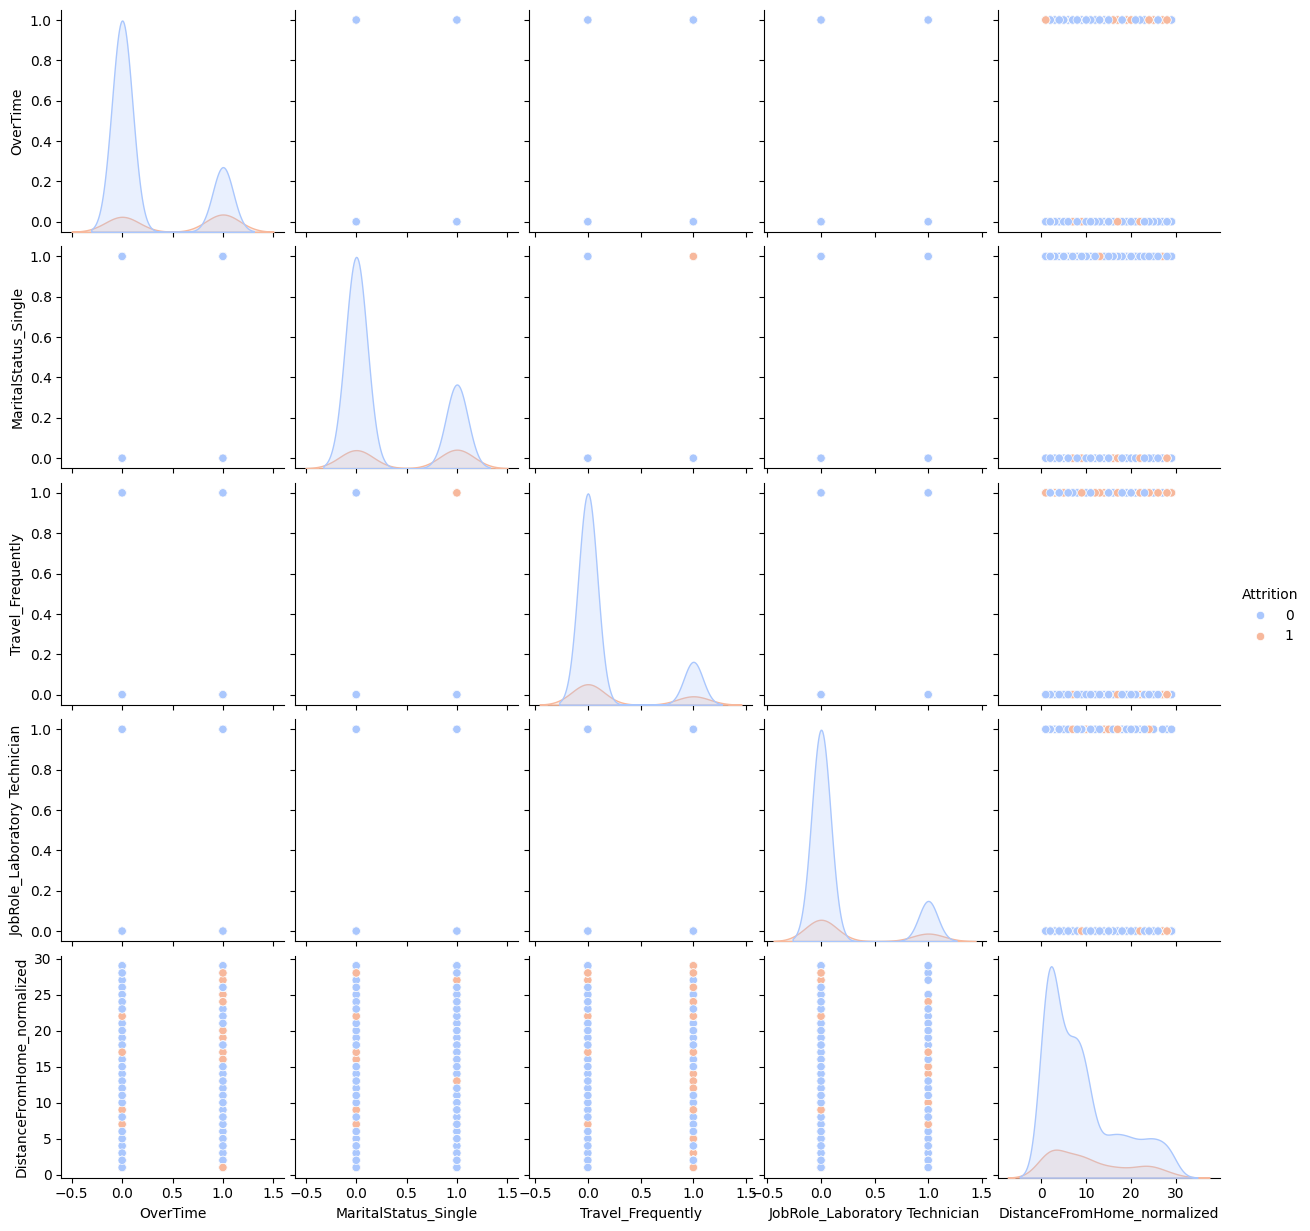

In [105]:
top_5_corr_columns = [
    'OverTime', 
    'MaritalStatus_Single', 
    'Travel_Frequently', 
    'JobRole_Laboratory Technician', 
    'DistanceFromHome_normalized'
]

# Create the pairplot
sns.pairplot(df[top_5_corr_columns + ['Attrition']], hue='Attrition', palette='coolwarm')
plt.show()

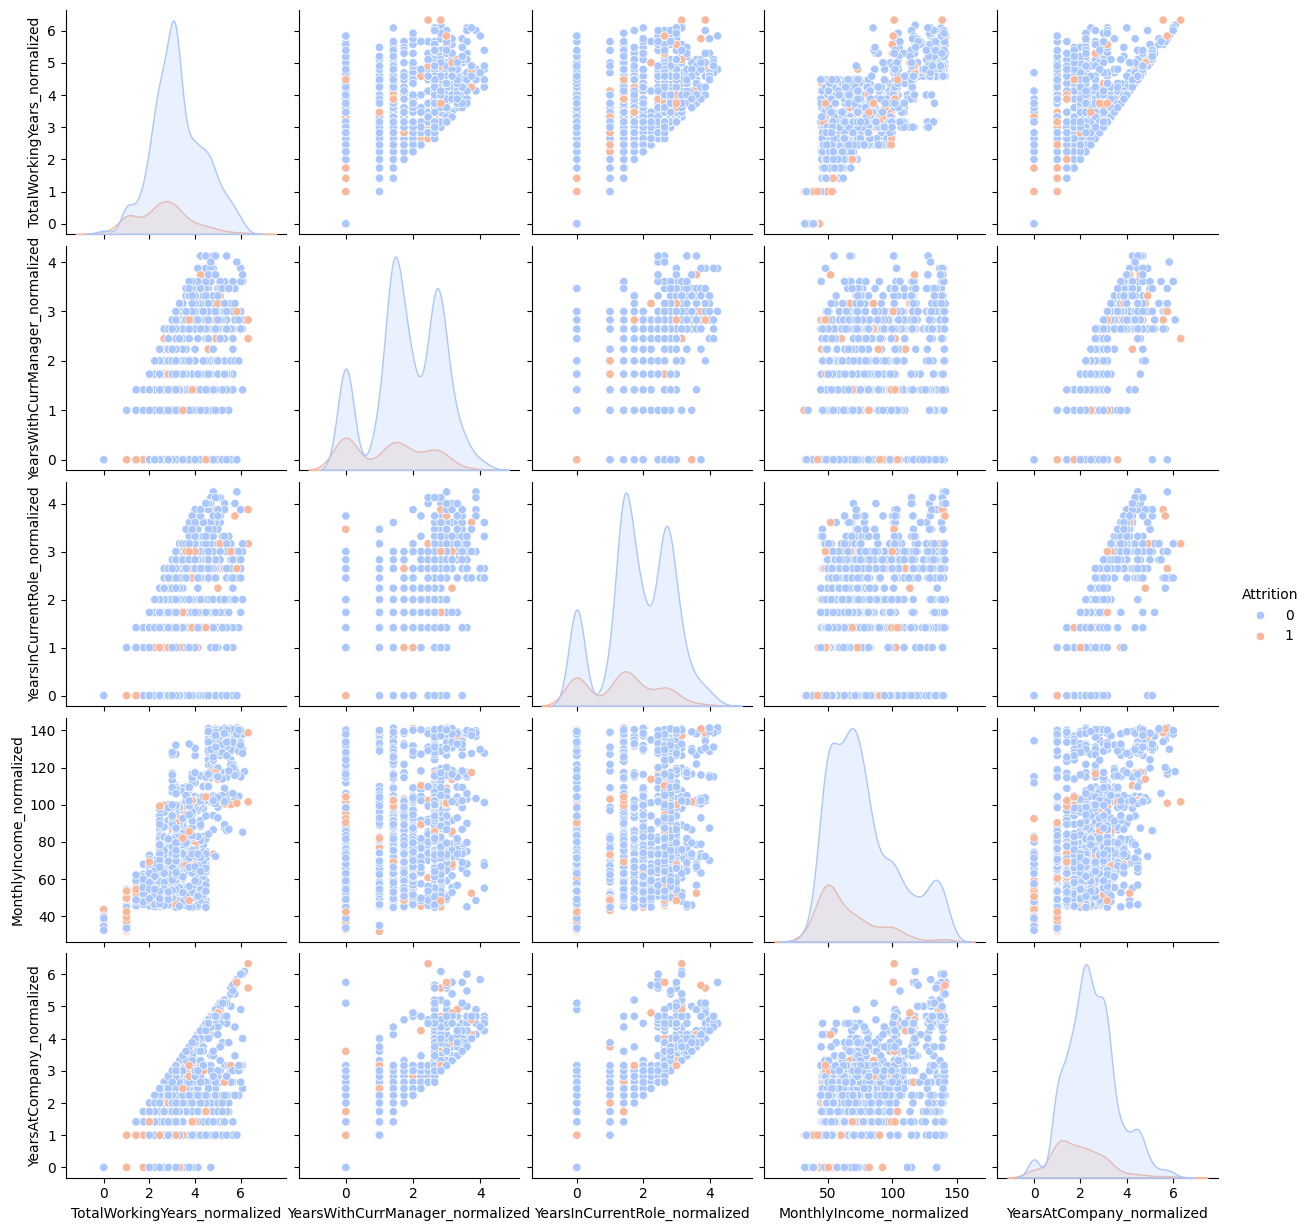

In [106]:
sns.pairplot(df[bottom_5_corr_columns + ['Attrition']], hue='Attrition', palette='coolwarm')
plt.show()

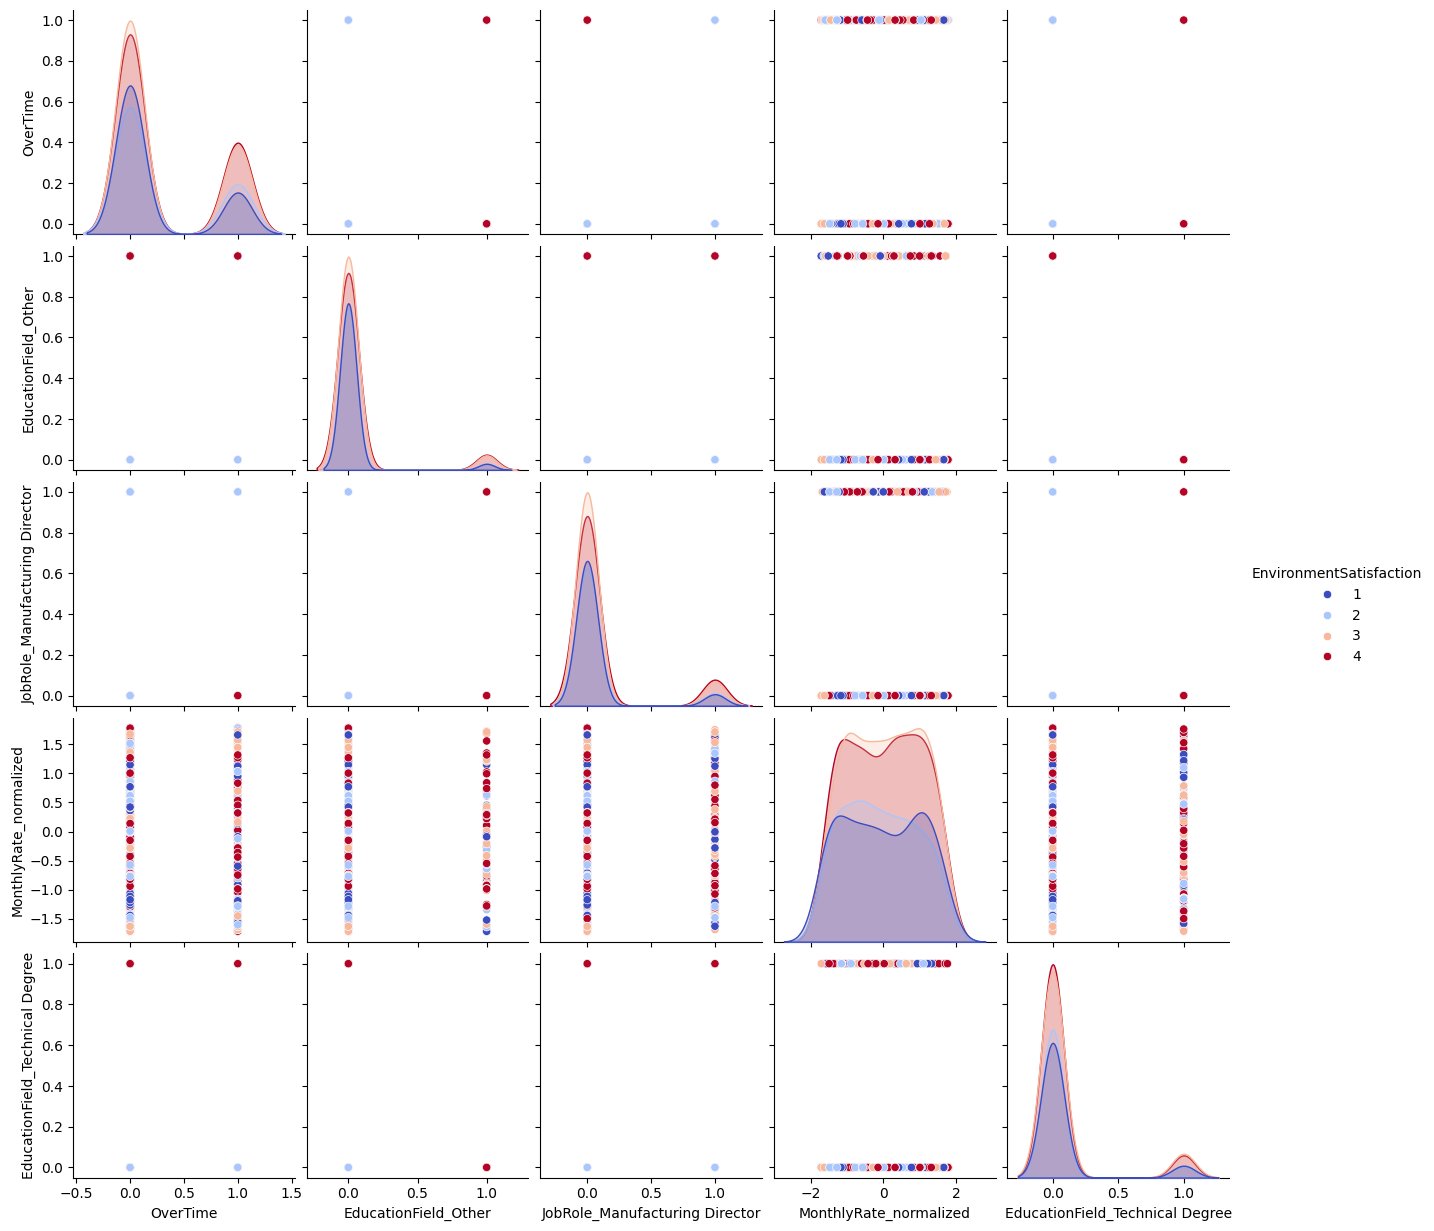

In [107]:
top_5_corr_columns = [
    'OverTime', 
    'EducationField_Other', 
    'JobRole_Manufacturing Director', 
    'MonthlyRate_normalized', 
    'EducationField_Technical Degree'
]

# Create the pairplot
sns.pairplot(df[top_5_corr_columns + ['EnvironmentSatisfaction']], hue='EnvironmentSatisfaction', palette='coolwarm')
plt.show()

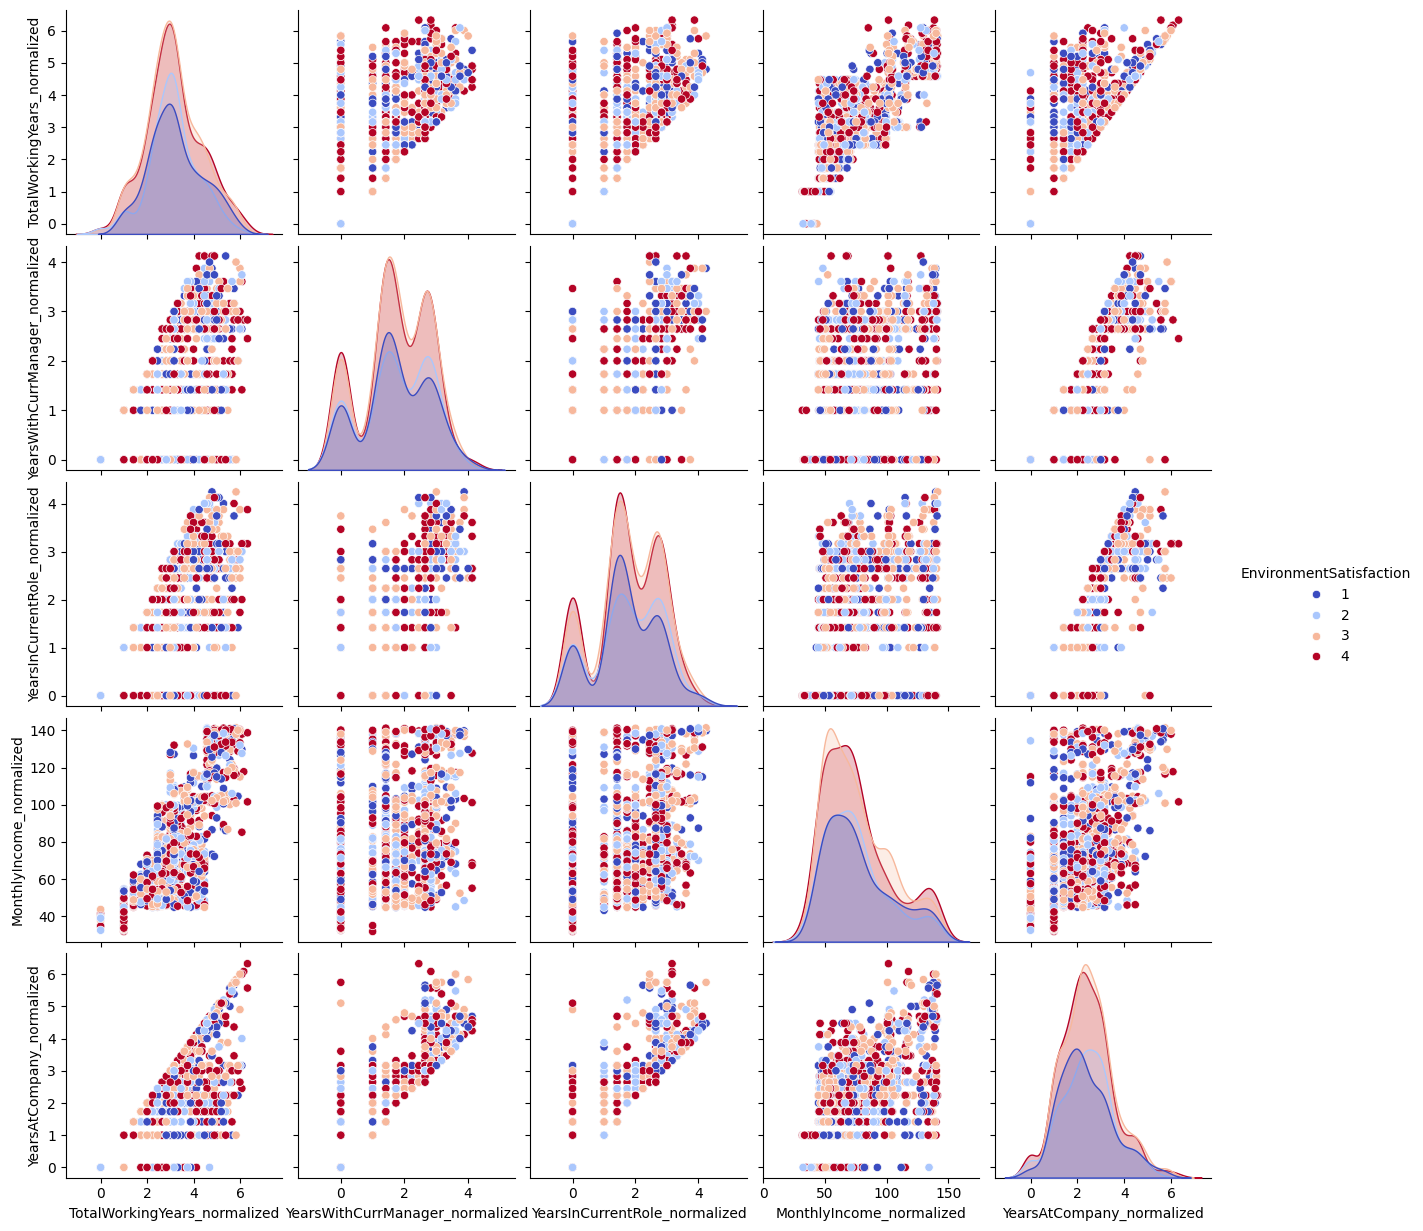

In [108]:
sns.pairplot(df[bottom_5_corr_columns + ['EnvironmentSatisfaction']], hue='EnvironmentSatisfaction', palette='coolwarm')
plt.show()

### Hypothesis testing:

- **Null Hypothesis (H₀)**: Employees with high values for the bottom-5 correlated features to attrition ("TotalWorkingYears_normalized," "YearsWithCurrManager_normalized," "YearsInCurrentRole_normalized," "MonthlyIncome_normalized," "YearsAtCompany_normalized") do not have a lower rate of attrition compared to the general population.

- **Alternative Hypothesis (H₁)**: Employees with high values for the bottom-5 correlated features to attrition have a lower rate of attrition compared to the general population.

- **Rationale**: The data shows 1,152 rows where these overlap conditions are met, of which 146 correspond to attrition (12.67%), compared to 1,006 rows without attrition (87.33%). This suggests these features might be protective against attrition.

In [109]:
bottom_5_corr_columns = [
    'TotalWorkingYears_normalized', 
    'YearsWithCurrManager_normalized', 
    'YearsInCurrentRole_normalized', 
    'MonthlyIncome_normalized', 
    'YearsAtCompany_normalized'
]

# Iterate through the columns and perform ANOVA for each feature
for column in bottom_5_corr_columns:
    # Group data by Attrition
    group_attrition_1 = df[df['Attrition'] == 1][column]
    group_attrition_0 = df[df['Attrition'] == 0][column]
    
    # Perform the ANOVA
    f_stat, p_value = stats.f_oneway(group_attrition_1, group_attrition_0)
    
    # Print results for each feature
    print(f"ANOVA results for {column}:")
    print(f"F-statistic: {f_stat}")
    print(f"P-value: {p_value}")
    
    # Descriptive hypothesis testing
    if p_value < 0.05:
        print(f"Reject the Null Hypothesis (H₀): There is a significant difference between employees with high values for '{column}' and their rate of attrition compared to the general population.")
        print(f"The data suggests that employees with high values for '{column}' may have a lower rate of attrition.")
    else:
        print(f"Fail to reject the Null Hypothesis (H₀): No significant difference between employees with high values for '{column}' and their rate of attrition compared to the general population.")
        print(f"The data suggests no evidence that employees with high values for '{column}' have a lower rate of attrition.")
    
    print("-" * 50)

ANOVA results for TotalWorkingYears_normalized:
F-statistic: 66.60640535793019
P-value: 7.056372371627645e-16
Reject the Null Hypothesis (H₀): There is a significant difference between employees with high values for 'TotalWorkingYears_normalized' and their rate of attrition compared to the general population.
The data suggests that employees with high values for 'TotalWorkingYears_normalized' may have a lower rate of attrition.
--------------------------------------------------
ANOVA results for YearsWithCurrManager_normalized:
F-statistic: 55.73794690466415
P-value: 1.4131854412483998e-13
Reject the Null Hypothesis (H₀): There is a significant difference between employees with high values for 'YearsWithCurrManager_normalized' and their rate of attrition compared to the general population.
The data suggests that employees with high values for 'YearsWithCurrManager_normalized' may have a lower rate of attrition.
--------------------------------------------------
ANOVA results for YearsI

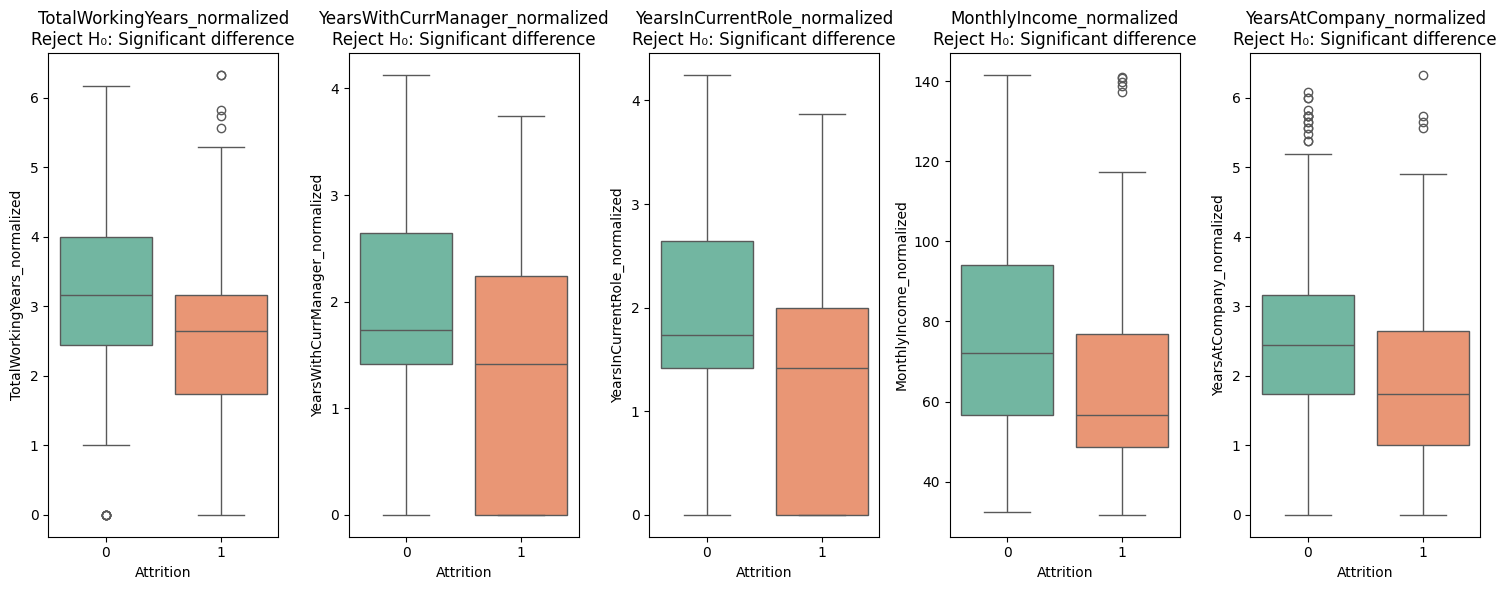

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# List of bottom 5 correlated columns
bottom_5_corr_columns = [
    'TotalWorkingYears_normalized', 
    'YearsWithCurrManager_normalized', 
    'YearsInCurrentRole_normalized', 
    'MonthlyIncome_normalized', 
    'YearsAtCompany_normalized'
]

# Create a subplot for each column
fig, axes = plt.subplots(nrows=1, ncols=len(bottom_5_corr_columns), figsize=(15, 6))

# Iterate through each column for ANOVA and box plot
for i, column in enumerate(bottom_5_corr_columns):
    # Group data by Attrition
    group_attrition_1 = df[df['Attrition'] == 1][column]
    group_attrition_0 = df[df['Attrition'] == 0][column]
    
    # Perform the ANOVA
    f_stat, p_value = stats.f_oneway(group_attrition_1, group_attrition_0)
    
    # Descriptive hypothesis testing
    if p_value < 0.05:
        hypothesis_result = f"Reject H₀: Significant difference"
    else:
        hypothesis_result = f"Fail to reject H₀: No significant difference"
    
    # Box Plot for each feature
    sns.boxplot(x='Attrition', y=column, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{column}\n{hypothesis_result}')
    axes[i].set_xlabel('Attrition')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

2. 
- **Null Hypothesis (H₀)**: "JobRole_Sales Representative" employees with normalized monthly incomes below the 50th percentile do not experience higher attrition rates compared to other sales representatives.

- **Alternative Hypothesis (H₁)**: "JobRole_Sales Representative" employees with normalized monthly incomes below the 50th percentile experience higher attrition rates.

- **Rationale**: Sales roles are often tied to performance-based incentives; low income might reflect poor performance, dissatisfaction, or misaligned expectations.

In [111]:
import scipy.stats as stats

# Define the column for Monthly Income and the Job Role filter
column = 'MonthlyIncome_normalized'
job_role_filter = 'JobRole_Sales Representative'

# Filter the dataset to only include employees in the Sales Representative role
sales_representative_df = df[df['JobRole_Sales Representative'] == 1]

# Calculate the 50th percentile (median) of normalized monthly income for the filtered sales representatives
income_median = sales_representative_df[column].median()

# Group employees based on whether their income is below or above the 50th percentile
below_median = sales_representative_df[sales_representative_df[column] < income_median]
above_median = sales_representative_df[sales_representative_df[column] >= income_median]

# Perform t-test for attrition between the two groups (below and above median income)
group_below_median = below_median['Attrition']
group_above_median = above_median['Attrition']

t_stat, p_value = stats.ttest_ind(group_below_median, group_above_median)

print(f"T-test results for {job_role_filter} employees with income below/above the 50th percentile:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print(f"Reject the Null Hypothesis (H₀): Sales representatives with normalized monthly incomes below the 50th percentile experience higher attrition rates compared to those with higher incomes.")
    print(f"The data suggests that employees with low incomes may have higher attrition rates.")
else:
    print(f"Fail to reject the Null Hypothesis (H₀): No significant difference in attrition rates between Sales representatives with normalized monthly incomes below and above the 50th percentile.")
    print(f"The data suggests no evidence that low income correlates with higher attrition rates.")
    
print("-" * 50)

T-test results for JobRole_Sales Representative employees with income below/above the 50th percentile:
T-statistic: 1.2067045831372973
P-value: 0.2310583475256584
Fail to reject the Null Hypothesis (H₀): No significant difference in attrition rates between Sales representatives with normalized monthly incomes below and above the 50th percentile.
The data suggests no evidence that low income correlates with higher attrition rates.
--------------------------------------------------


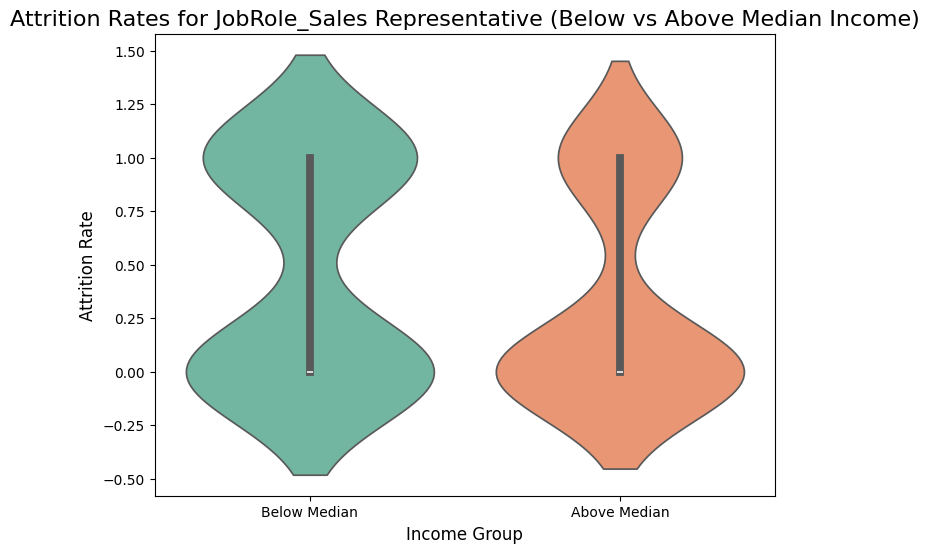

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the below_median and above_median data with the 'Income_Group' column
below_median['Income_Group'] = 'Below Median'
above_median['Income_Group'] = 'Above Median'
combined_df = pd.concat([below_median, above_median])

# Create a violin plot for comparing attrition rates between the two groups (below vs above median)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Income_Group', y='Attrition', data=combined_df, palette='Set2')

# Title and labels
plt.title(f'Attrition Rates for {job_role_filter} (Below vs Above Median Income)', fontsize=16)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.show()

3. 
- **Null Hypothesis (H₀)**: Employees with normalized monthly incomes in the bottom 25th percentile are not more likely to experience high levels of overtime compared to the general population.

- **Alternative Hypothesis (H₁)**: Employees with normalized monthly incomes in the bottom 25th percentile are more likely to experience high levels of overtime compared to the general population.

- **Rationale**: While income and attrition have a negative correlation, overtime might disproportionately impact low-income workers, creating unexpected attrition triggers.

In [113]:
# Define the column for normalized monthly income and the overtime column
column = 'MonthlyIncome_normalized'
overtime_column = 'OverTime'

# Calculate the 25th percentile for monthly income
income_25th_percentile = df[column].quantile(0.25)

# Create two groups: below and above the 25th percentile of income
below_25th_percentile = df[df[column] < income_25th_percentile]
above_25th_percentile = df[df[column] >= income_25th_percentile]

# Get the overtime status for each group
group_below_25th_overtime = below_25th_percentile[overtime_column]
group_above_25th_overtime = above_25th_percentile[overtime_column]

# Calculate the overtime rate for each group (percentage of '1' for overtime)
overtime_below_25th = group_below_25th_overtime.mean()
overtime_above_25th = group_above_25th_overtime.mean()

# Calculate the overtime prevalence (mean) for each group
overtime_prevalence_below_25th = group_below_25th_overtime.mean()
overtime_prevalence_above_25th = group_above_25th_overtime.mean()

# Print the overtime prevalence (mean) for both groups
print(f"Overtime prevalence (mean) for employees with normalized monthly incomes below and above the 25th percentile:")
print(f"Overtime prevalence (mean) for employees below 25th percentile income: {overtime_prevalence_below_25th:.2f}")
print(f"Overtime prevalence (mean) for employees above 25th percentile income: {overtime_prevalence_above_25th:.2f}")

# Test the hypothesis: compare overtime prevalence for the two income groups
if overtime_prevalence_below_25th > overtime_prevalence_above_25th:
    print(f"Reject the Null Hypothesis (H₀): Employees with normalized monthly incomes in the bottom 25th percentile are more likely to experience high levels of overtime compared to the general population.")
    print(f"The data suggests that low-income employees are more likely to experience overtime.")
else:
    print(f"Fail to reject the Null Hypothesis (H₀): No significant difference in overtime prevalence between employees with normalized monthly incomes below and above the 25th percentile.")
    print(f"The data suggests no evidence that low-income employees experience more overtime.")
    
print("-" * 50)

Overtime prevalence (mean) for employees with normalized monthly incomes below and above the 25th percentile:
Overtime prevalence (mean) for employees below 25th percentile income: 0.29
Overtime prevalence (mean) for employees above 25th percentile income: 0.28
Reject the Null Hypothesis (H₀): Employees with normalized monthly incomes in the bottom 25th percentile are more likely to experience high levels of overtime compared to the general population.
The data suggests that low-income employees are more likely to experience overtime.
--------------------------------------------------
